In [27]:
import json
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        if random.random() < 0.3:
            data.append(json.loads(line))
            
reviews = pd.DataFrame(data)

In [3]:
reviews.shape

(749050, 10)

In [4]:
reviews = reviews[reviews['verified_purchase'] == True] #keep only verified purchases

In [5]:
reviews.shape

(700114, 10)

In [6]:
reviews = reviews[['rating','parent_asin','text']] #keep only the columns we are interested in

In [7]:
reviews

,rating,parent_asin,text
0,1.0,B07F2BTFS9,Crappy socks. Money wasted. Bought to wear wit...
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...
2,5.0,B08QSLJGDL,Cutest little mask I bought for my grand daugh...
3,5.0,B0865YZ2KL,Fits very well
4,5.0,B01EBBUFGW,These earrings are more attractive in reality ...
...,...,...,...
749045,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...
749046,5.0,B07HF4F6LP,Great piece
749047,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...
749048,1.0,B00YGFMQC0,Says ten tie clips but o only received 7.


In [8]:
file = "meta_Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        data.append(json.loads(line))
            
description = pd.DataFrame(data)

In [9]:
description.shape

(826108, 14)

In [10]:
description = description[['title','parent_asin','average_rating']] #keep only the columns we are interested in

In [11]:
description

,title,parent_asin,average_rating
0,YUEDGE 5 Pairs Men's Moisture Control Cushione...,B08BHN9PK5,4.6
1,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,B08R39MRDW,4.1
2,Pastel by Vivienne Honey Vanilla Girls' Trapez...,B077KJHCJ4,4.3
3,Mento Streamtail,B0811M2JG9,2.0
4,RONNOX Women's 3-Pairs Bright Colored Calf Com...,B07SB2892S,4.3
...,...,...,...
826103,Salimdy Women's Fashion New Ruched Waist Class...,B078HY8B34,2.0
826104,Cat Mom Tshirt Trendy Short Sleeve Crewneck Gr...,B09V5DB85S,5.0
826105,Nike San Francisco 49ers Hot Quarter Zip S/S P...,B00NTQ14CK,5.0
826106,Joe's USA Mens 3X-Large Tall Long Sleeve Easy ...,B00Y8O4N8E,5.0


In [12]:
merged_df = reviews.merge(description, on="parent_asin", how="inner")

In [13]:
merged_df

,rating,parent_asin,text,title,average_rating
0,1.0,B07F2BTFS9,Crappy socks. Money wasted. Bought to wear wit...,VERO MONTE 4 Pairs Womens TRULY No Show Socks ...,4.0
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...,joyliveCY Women Charm Jewerly Rose Gold Plated...,4.1
2,5.0,B08QSLJGDL,Cutest little mask I bought for my grand daugh...,Livia Face Mask Gift Birthday Quarantine Mask ...,5.0
3,5.0,B0865YZ2KL,Fits very well,Comfortable Adjustable Gothic Ouija Boards Art...,5.0
4,5.0,B01EBBUFGW,These earrings are more attractive in reality ...,Gem Stone King Orange Red Cluster Faceted Crys...,3.5
...,...,...,...,...,...
700109,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...,Charmed Craft Mother Mom Love Child Charms Ele...,4.5
700110,5.0,B07HF4F6LP,Great piece,Charmed Craft Mother Mom Love Child Charms Ele...,4.5
700111,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5
700112,1.0,B00YGFMQC0,Says ten tie clips but o only received 7.,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5


In [29]:
merged_df['category'] = 'TBD'

import re

patterns = {
    'Shirts/Tops': r'\b(shirt\w*|t[- ]?shirt\w*|blouse\w*|tank\w*|polo\w*|tee\w*)\b',
    'Pants/Bottoms': r'\b(pant\w*|trouser\w*|jean\w*|legging\w*|short\w*|sweatpant\w*)\b',
    'Skirts': r'\b(skirt\w*)\b',
    'Dresses': r'\b(dress\w*|gown\w*)\b',
    'Outerwear': r'\b(jacket\w*|coat\w*|blazer\w*|parka\w*|hoodie\w*|cardigan\w*)\b',
    'Shoes': r'\b(sneaker\w*|boot\w*|sandal\w*|loafer\w*|heel\w*|flat\w*)\b',
    'Socks/Underwear': r'\b(sock\w*|underwear\w*|brief\w*|boxer\w*|bra\w*)\b',
    'Jewelry': r'\b(ring\w*|necklace\w*|earring\w*|bracelet\w*|pendant\w*|chain\w*|anklet\w*)\b',
    'Accessories': r'\b(hat\w*|cap\w*|belt\w*|scarf\w*|glove\w*|sunglass\w*|watch\w*|tie\w*)\b',
    'Bags': r'\b(\w*bag\w*|backpack\w*|purse\w*|tote\w*)\b'
}

# Function to categorize
def categorize_product(title):
    for category, pattern in patterns.items():
        if re.search(pattern, title, re.IGNORECASE):
            return category
    return 'Other'

# Apply to DataFrame
merged_df['category'] = merged_df['title'].apply(categorize_product)

merged_df['category'].value_counts()

category
Other              133759
Accessories        102913
Shirts/Tops         90333
Jewelry             89244
Pants/Bottoms       66951
Socks/Underwear     66663
Dresses             65051
Outerwear           26492
Shoes               25942
Bags                24626
Skirts               8140
Name: count, dtype: int64

In [30]:
merged_df

,rating,parent_asin,text,title,average_rating,category
0,1.0,B07F2BTFS9,Crappy socks. Money wasted. Bought to wear wit...,VERO MONTE 4 Pairs Womens TRULY No Show Socks ...,4.0,Socks/Underwear
1,4.0,B00N9X4XNU,Would be five stars but they are just too heav...,joyliveCY Women Charm Jewerly Rose Gold Plated...,4.1,Jewelry
2,5.0,B08QSLJGDL,Cutest little mask I bought for my grand daugh...,Livia Face Mask Gift Birthday Quarantine Mask ...,5.0,Other
3,5.0,B0865YZ2KL,Fits very well,Comfortable Adjustable Gothic Ouija Boards Art...,5.0,Other
4,5.0,B01EBBUFGW,These earrings are more attractive in reality ...,Gem Stone King Orange Red Cluster Faceted Crys...,3.5,Jewelry
...,...,...,...,...,...,...
700109,5.0,B07HF4F6LP,I bought this for my mom for Mother’s Day she ...,Charmed Craft Mother Mom Love Child Charms Ele...,4.5,Socks/Underwear
700110,5.0,B07HF4F6LP,Great piece,Charmed Craft Mother Mom Love Child Charms Ele...,4.5,Socks/Underwear
700111,1.0,B00YGFMQC0,I got an empty bag in my package of 10 that I ...,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5,Accessories
700112,1.0,B00YGFMQC0,Says ten tie clips but o only received 7.,Set of 10 Tie Clips - Elegant Designs (tc10b) ...,4.5,Accessories


### Exploring the Dataset

In [31]:
# Check for missing values in merged_df
missing_values = merged_df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print("\nTotal missing values:", missing_values.sum())
print("\nPercentage of missing values per column:")
print((missing_values / len(merged_df) * 100).round(2))


Missing values per column:
rating            0
parent_asin       0
text              0
title             0
average_rating    0
category          0
dtype: int64

Total missing values: 0

Percentage of missing values per column:
rating            0.0
parent_asin       0.0
text              0.0
title             0.0
average_rating    0.0
category          0.0
dtype: float64


In [32]:
# Show unique items based on count of title in table form
title_counts = merged_df['title'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']
title_counts = title_counts.sort_values('Count', ascending=False).reset_index(drop=True)
print(f"Total number of unique titles: {merged_df['title'].nunique()}")
print(f"Total number of rows: {len(merged_df)}\n")
title_counts


Total number of unique titles: 335155
Total number of rows: 700114



,Title,Count
0,Casio F91W-1 Classic Resin Strap Digital Sport...,2104
1,Russell Athletic Men's Dri-Power Fleece Hoodie...,1848
2,NELEUS Women's 3 Pack Compression Base Layer D...,1214
3,90 Degree By Reflex High Waist Squat Proof Tum...,984
4,NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...,931
...,...,...
335150,Kenoce Women Floral Print Jumpsuit Summer Deep...,1
335151,Casei Men's Athletic Running Pants Joggers Lou...,1
335152,ReVeaL Women's Classic Denim Vest (DK 2X),1
335153,OCHENTA Girls Dress Coat Wool Jacket Khaki 7-8...,1


##### The casio watch has the most reviews, followed by the fleece hoodie.

In [17]:
# Table displaying titles with the highest average_ratings
title_avg_ratings = merged_df.groupby('title')['average_rating'].mean().reset_index()
title_avg_ratings.columns = ['Title', 'Average Rating']
title_avg_ratings = title_avg_ratings.sort_values('Average Rating', ascending=False).reset_index(drop=True)
title_avg_ratings


,Title,Average Rating
0,Noble Outfitters Bracelet Women Bangle On The ...,5.0
1,HEIMO Women's Sequined Evening Party Gowns Bea...,5.0
2,HEIMO Long Beading Ball Gown Formal Party Dres...,5.0
3,HEIMO Long Beading Ball Gown Formal Party Dres...,5.0
4,CharmSStory Mom Mother Charm Heart I Love You ...,5.0
...,...,...
335150,Romwe Men's Graphic Tees Short Sleeve Round Ne...,1.0
335151,ZOMIHOYANG Button Down Shirts Short Sleeve V N...,1.0
335152,ENSIANTH Zodiac Signs Heart Necklace Stainless...,1.0
335153,LECHEERS Women Vintage 1950's Floral Spring Pi...,1.0


/var/folders/kc/n08kwy8s585_2lbjxjmy0d9m0000gn/T/ipykernel_33220/3218966857.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


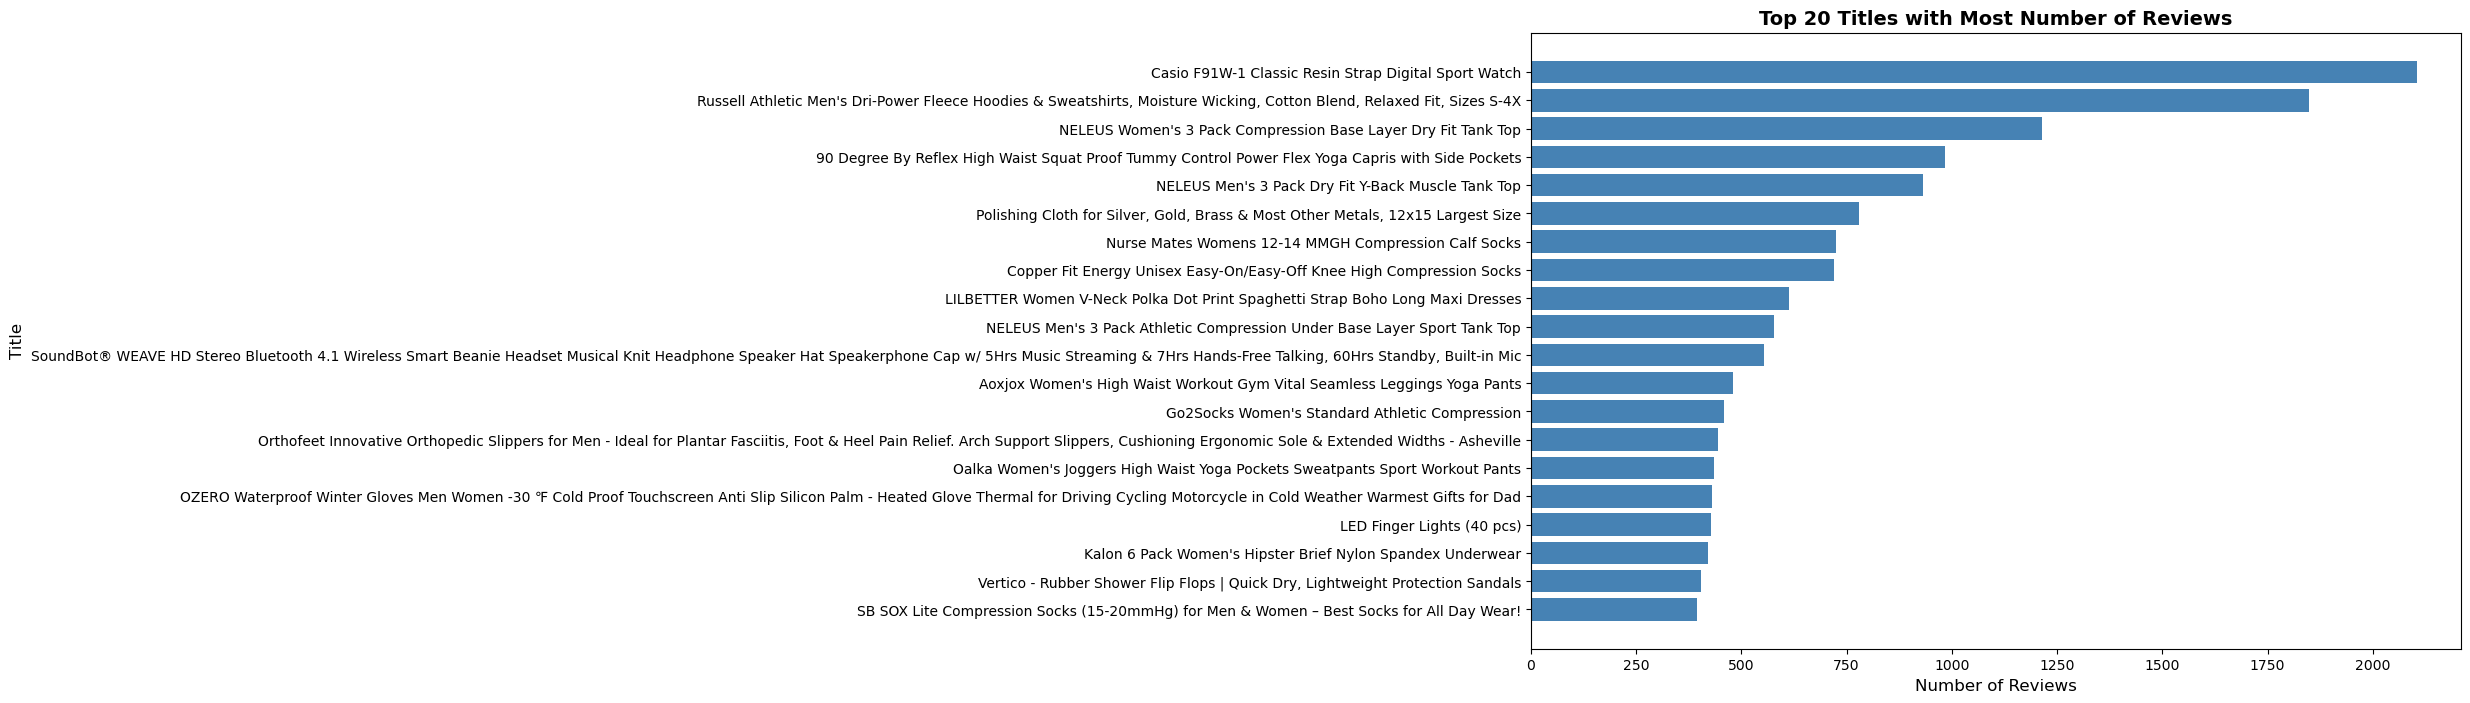

Total number of unique titles: 335155

Top 10 titles by review count:
                                               Title  Number of Reviews
0  Casio F91W-1 Classic Resin Strap Digital Sport...               2104
1  Russell Athletic Men's Dri-Power Fleece Hoodie...               1848
2  NELEUS Women's 3 Pack Compression Base Layer D...               1214
3  90 Degree By Reflex High Waist Squat Proof Tum...                984
4  NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...                931
5  Polishing Cloth for Silver, Gold, Brass & Most...                780
6  Nurse Mates Womens 12-14 MMGH Compression Calf...                725
7  Copper Fit Energy Unisex Easy-On/Easy-Off Knee...                719
8  LILBETTER Women V-Neck Polka Dot Print Spaghet...                612
9  NELEUS Men's 3 Pack Athletic Compression Under...                578


In [18]:
# Bar chart showing titles with the most number of reviews (text)
title_review_counts = merged_df.groupby('title')['text'].count().reset_index()
title_review_counts.columns = ['Title', 'Number of Reviews']
title_review_counts = title_review_counts.sort_values('Number of Reviews', ascending=False).reset_index(drop=True)

# Get top 20 titles for better visualization
top_titles = title_review_counts.head(20)

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_titles)), top_titles['Number of Reviews'], color='steelblue')
plt.yticks(range(len(top_titles)), top_titles['Title'])
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Top 20 Titles with Most Number of Reviews', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

print(f"Total number of unique titles: {len(title_review_counts)}")
print(f"\nTop 10 titles by review count:")
print(top_titles.head(10))


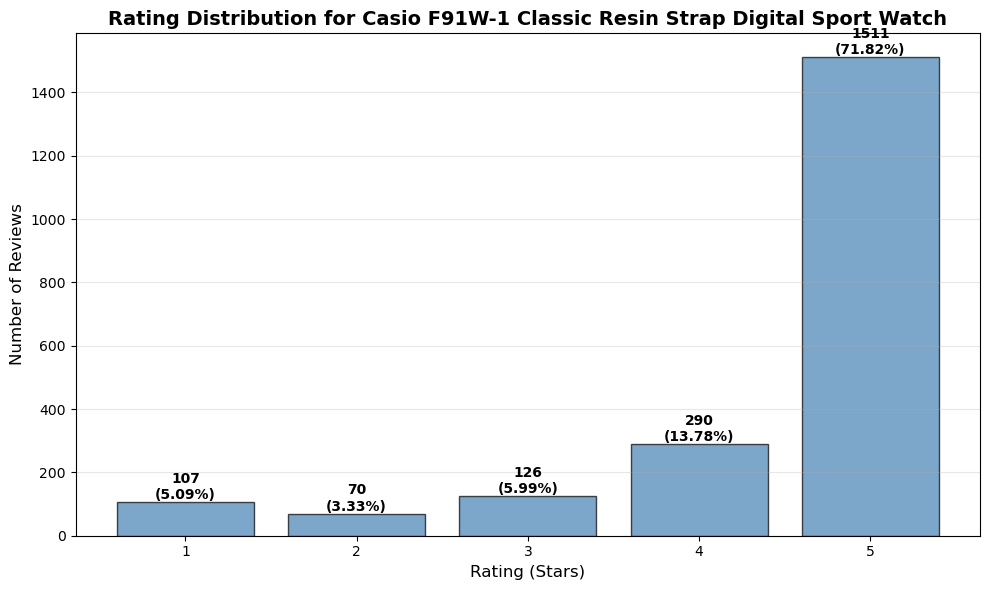

Total reviews: 2104

Rating distribution:
rating
1.0     107
2.0      70
3.0     126
4.0     290
5.0    1511
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 5.09%
  2.0 stars: 3.33%
  3.0 stars: 5.99%
  4.0 stars: 13.78%
  5.0 stars: 71.82%

Average rating: 4.44
Median rating: 5.00


In [19]:
# Distribution of ratings for Casio F91W-1 Classic Resin Strap Digital Sport Watch
casio_title = "Casio F91W-1 Classic Resin Strap Digital Sport Watch"
casio_df = merged_df[merged_df['title'] == casio_title]

# Count ratings
rating_dist = casio_df['rating'].value_counts().sort_index()
rating_percentages = (casio_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title(f'Rating Distribution for {casio_title}', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (rating, count) in enumerate(rating_dist.items()):
    plt.text(rating, count, f'{count}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews: {len(casio_df)}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}%")
print(f"\nAverage rating: {casio_df['rating'].mean():.2f}")
print(f"Median rating: {casio_df['rating'].median():.2f}")


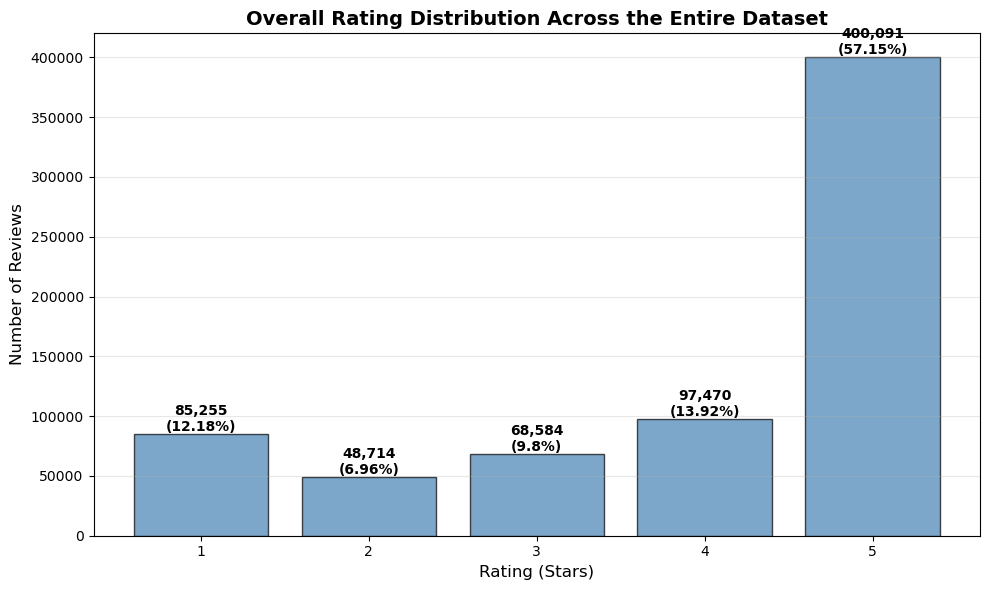

Total reviews in dataset: 700,114

Rating distribution:
rating
1.0     85255
2.0     48714
3.0     68584
4.0     97470
5.0    400091
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 12.18% (85,255 reviews)
  2.0 stars: 6.96% (48,714 reviews)
  3.0 stars: 9.8% (68,584 reviews)
  4.0 stars: 13.92% (97,470 reviews)
  5.0 stars: 57.15% (400,091 reviews)

Average rating: 3.97
Median rating: 5.00
Standard deviation: 1.43


In [33]:
# Overall distribution of ratings across the whole dataset
rating_dist = merged_df['rating'].value_counts().sort_index()
rating_percentages = (merged_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Overall Rating Distribution Across the Entire Dataset', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for rating, count in rating_dist.items():
    plt.text(rating, count, f'{count:,}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews in dataset: {len(merged_df):,}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}% ({rating_dist[rating]:,} reviews)")
print(f"\nAverage rating: {merged_df['rating'].mean():.2f}")
print(f"Median rating: {merged_df['rating'].median():.2f}")
print(f"Standard deviation: {merged_df['rating'].std():.2f}")


In [34]:
# Products with the lowest ratings (including review text)
# First, calculate average rating per product
title_avg_ratings = merged_df.groupby('title')['rating'].mean().reset_index()
title_avg_ratings.columns = ['title', 'avg_rating']
title_avg_ratings = title_avg_ratings.sort_values('avg_rating', ascending=True)

# Merge back with original data to get all reviews for lowest-rated products
# Get top N products with lowest ratings (e.g., top 100)
lowest_rated_titles = title_avg_ratings.head(100)['title'].tolist()
lowest_rated_df = merged_df[merged_df['title'].isin(lowest_rated_titles)].copy()

# Add average rating column for each product
lowest_rated_df = lowest_rated_df.merge(title_avg_ratings, on='title', how='left')

# Sort by average rating (ascending) and then by individual rating
lowest_rated_df = lowest_rated_df.sort_values(['avg_rating', 'rating'], ascending=[True, True]).reset_index(drop=True)

# Select and rename columns for display
result_df = lowest_rated_df[['title', 'rating', 'text', 'avg_rating']].copy()
result_df.columns = ['Title', 'Review Rating', 'Review Text', 'Product Average Rating']
result_df['Product Average Rating'] = result_df['Product Average Rating'].round(2)

print(f"Reviews for products with the lowest average ratings:")
print(f"Showing reviews for top 100 lowest-rated products")
print(f"Total reviews shown: {len(result_df)}\n")
result_df


Reviews for products with the lowest average ratings:
Showing reviews for top 100 lowest-rated products
Total reviews shown: 108



,Title,Review Rating,Review Text,Product Average Rating
0,DREAM PAIRS Little Kid 160863-K Fuchsia Cyan B...,1.0,I ordered these 2 months ago! Terrible quality...,1.0
1,Romwe Women's Sparkle Sequin V Neck Cami Sexy ...,1.0,Too small and the strap broke off on first wea...,1.0
2,Winter Balaclava Ski Mask Cold Weather Windpro...,1.0,I used one to go skiing. The stitching stuck o...,1.0
3,DOUBLJU Classic Draped Open Front Blazer for W...,1.0,Too small and not the color it says on the page.,1.0
4,Romwe Women's Summer Graphic Short Sleeve Basi...,1.0,This shirt is poorly made and looks very cheap...,1.0
...,...,...,...,...
103,Winter Hat Beanie for Men & Women Custom Perso...,1.0,"Terrible design. Like I said, it might have fi...",1.0
104,KOJOOIN Womens Puff Sleeve Square Neck Puffy D...,1.0,The dress not only was see through but also th...,1.0
105,Gem Stone King 14K Yellow Gold Blue Topaz Pend...,1.0,The stone is a pretty color however it does no...,1.0
106,KOJOOIN Womens Summer V Neck Tunic Dress Short...,1.0,This dress sizes run large and not well fitting,1.0


/var/folders/kc/n08kwy8s585_2lbjxjmy0d9m0000gn/T/ipykernel_33220/1075569783.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='rating', data=merged_df, ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Socks/Underwear'),
  Text(1, 0, 'Jewelry'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Accessories'),
  Text(4, 0, 'Shirts/Tops'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Dresses'),
  Text(7, 0, 'Pants/Bottoms'),
  Text(8, 0, 'Outerwear'),
  Text(9, 0, 'Shoes'),
  Text(10, 0, 'Skirts')])

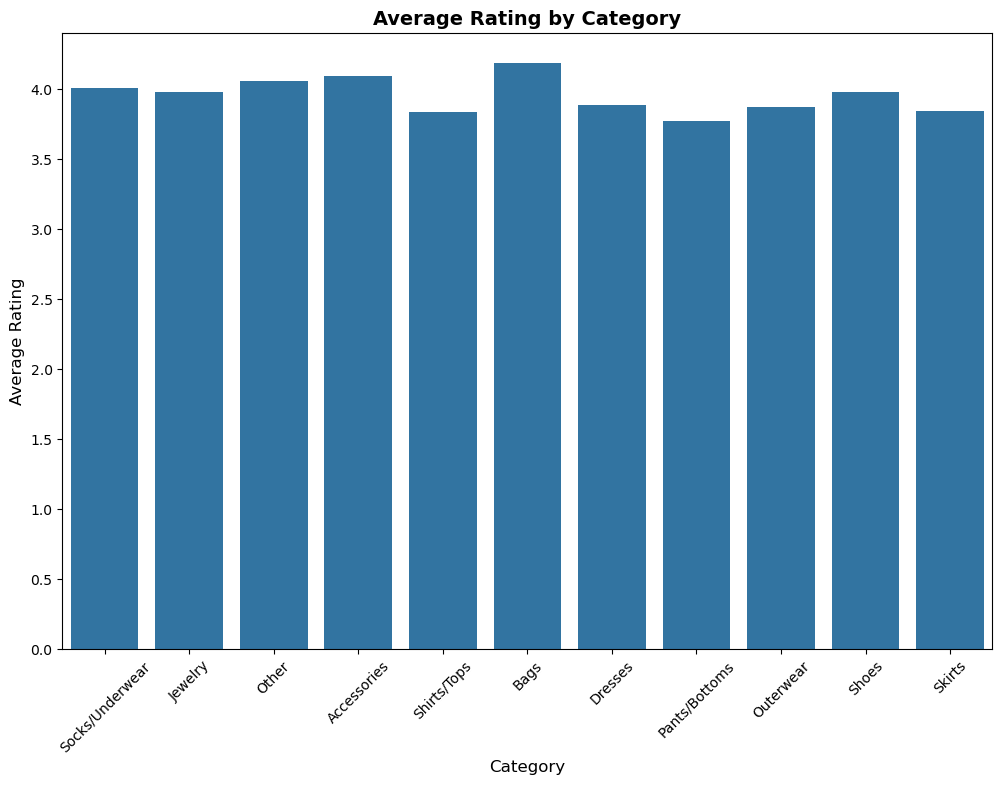

In [35]:
#Ditribution of ratings in the dataset based on the category. Show me a bar chart of the distribution of the ratings in the dataset based on the category.
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='rating', data=merged_df, ci=None)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Rating by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

### Balancing the Dataset

Method 1: Random Undersampling to balance the dataset by only keeping a portion of items that have 5.0 rating. In this scenario, there are an equal number of 5.0 rating items and 1.0 rating items.

In [36]:
#Random undersampling
# Take a random sample of the majority class
majority_class = merged_df[merged_df['rating'] == 5]
majority_sample = majority_class.sample(n=len(merged_df[merged_df['rating'] == 1]), random_state=42)

#Replace the majority class (rating = 5) with the majority sample
#balanced_df = merged_df[merged_df['rating'] != 5].append(majority_sample)
balanced_df = pd.concat([merged_df[merged_df['rating'] != 5], majority_sample])

#Check the balance of the dataset
print(balanced_df['rating'].value_counts())


rating
4.0    97470
1.0    85255
5.0    85255
3.0    68584
2.0    48714
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x4417d9ac0>,
 [Text(4.0, 0, '4'),
  Text(1.0, 0, '1'),
  Text(5.0, 0, '5'),
  Text(3.0, 0, '3'),
  Text(2.0, 0, '2')])

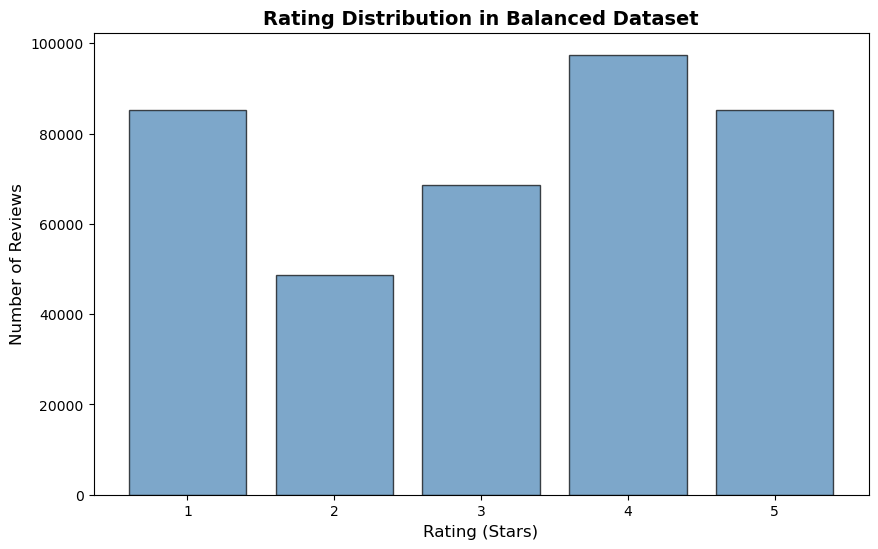

In [37]:
#show me a bar chart of the distribution of the ratings in the balanced dataset
plt.figure(figsize=(10, 6))
bars = plt.bar(balanced_df['rating'].value_counts().index, balanced_df['rating'].value_counts().values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Rating Distribution in Balanced Dataset', fontsize=14, fontweight='bold')
plt.xticks(balanced_df['rating'].value_counts().index)

Method 2: Random undersampling by taking an equal random sampling of all ratings (from 1.0 to 5.0). 

In [38]:
# Random undersampling by taking an equal random sampling of all ratings (from 1.0 to 5.0)
# Find the minimum count among all rating categories
rating_counts = merged_df['rating'].value_counts().sort_index()
min_count = rating_counts.min()

print(f"Original rating distribution:")
print(rating_counts)
print(f"\nMinimum count across all ratings: {min_count}")
print(f"This will be the sample size for each rating category.\n")

# Randomly sample equal number of samples from each rating category
balanced_samples = []
for rating in sorted(merged_df['rating'].unique()):
    rating_df = merged_df[merged_df['rating'] == rating]
    sample = rating_df.sample(n=min_count, random_state=42)
    balanced_samples.append(sample)
    print(f"Rating {rating}: Sampled {len(sample)} reviews (from {len(rating_df)} total)")

# Combine all samples into balanced dataset
balanced_df_equal = pd.concat(balanced_samples, ignore_index=True)

# Shuffle the balanced dataset
balanced_df_equal = balanced_df_equal.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced dataset shape: {balanced_df_equal.shape}")
print(f"\nFinal rating distribution:")
print(balanced_df_equal['rating'].value_counts().sort_index())

Original rating distribution:
rating
1.0     85255
2.0     48714
3.0     68584
4.0     97470
5.0    400091
Name: count, dtype: int64

Minimum count across all ratings: 48714
This will be the sample size for each rating category.

Rating 1.0: Sampled 48714 reviews (from 85255 total)
Rating 2.0: Sampled 48714 reviews (from 48714 total)
Rating 3.0: Sampled 48714 reviews (from 68584 total)
Rating 4.0: Sampled 48714 reviews (from 97470 total)
Rating 5.0: Sampled 48714 reviews (from 400091 total)

Balanced dataset shape: (243570, 6)

Final rating distribution:
rating
1.0    48714
2.0    48714
3.0    48714
4.0    48714
5.0    48714
Name: count, dtype: int64


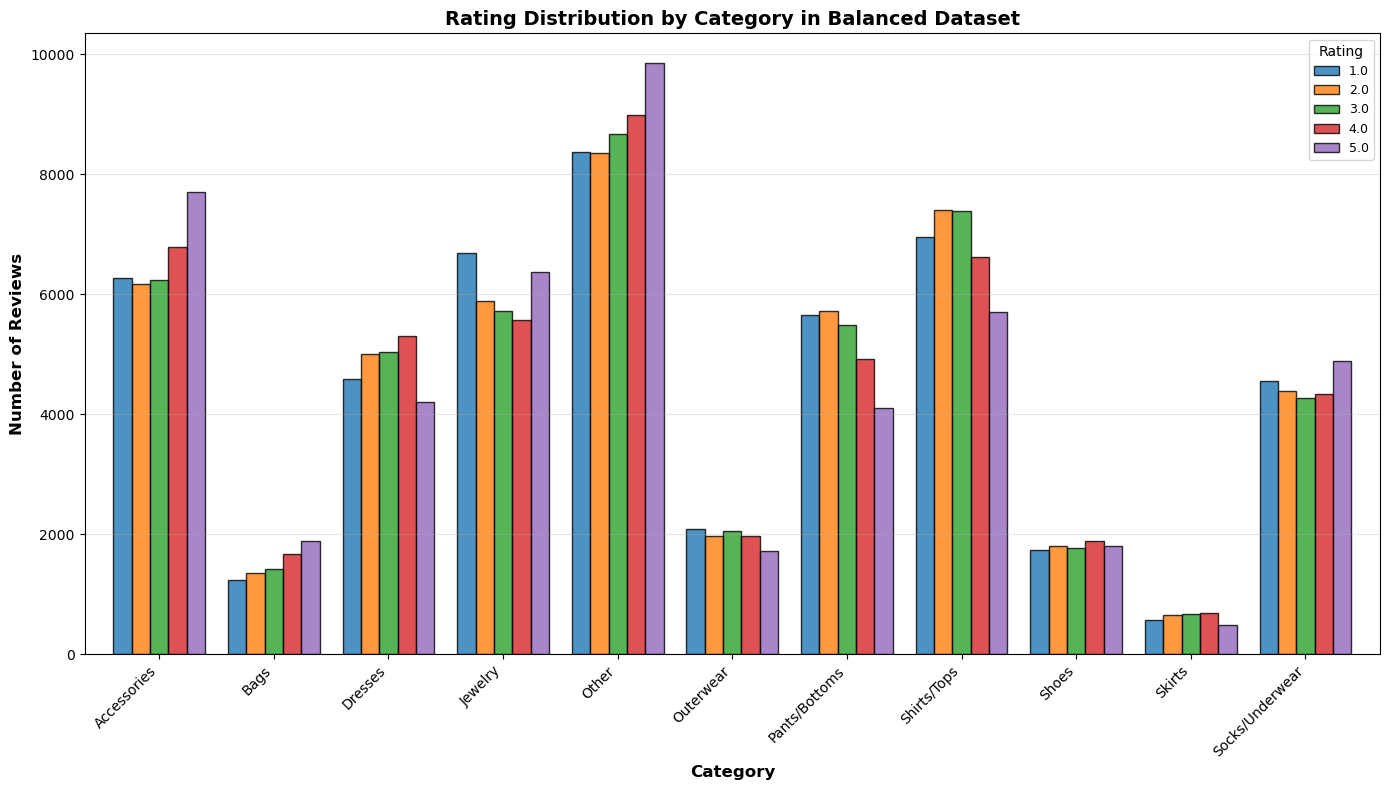

Rating distribution by category:
rating            1.0   2.0   3.0   4.0   5.0
category                                     
Accessories      6275  6168  6229  6791  7695
Bags             1243  1346  1415  1671  1881
Dresses          4584  5008  5037  5296  4201
Jewelry          6691  5893  5726  5562  6376
Other            8375  8351  8671  8988  9855
Outerwear        2080  1974  2059  1971  1725
Pants/Bottoms    5654  5716  5480  4916  4098
Shirts/Tops      6957  7410  7394  6621  5709
Shoes            1739  1807  1766  1886  1798
Skirts            571   656   674   680   488
Socks/Underwear  4545  4385  4263  4332  4888

Total reviews per category:
category
Accessories        33158
Bags                7556
Dresses            24126
Jewelry            30248
Other              44240
Outerwear           9809
Pants/Bottoms      25864
Shirts/Tops        34091
Shoes               8996
Skirts              3069
Socks/Underwear    22413
dtype: int64


In [39]:
# Bar chart of the distribution of ratings in the balanced dataset according to category
# Create a cross-tabulation of category and rating
category_rating_counts = pd.crosstab(balanced_df_equal['category'], balanced_df_equal['rating'])

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
category_rating_counts.plot(kind='bar', ax=ax, width=0.8, edgecolor='black', alpha=0.8)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.title('Rating Distribution by Category in Balanced Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating', labels=['1.0', '2.0', '3.0', '4.0', '5.0'], title_fontsize=10, fontsize=9)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Rating distribution by category:")
print(category_rating_counts)
print(f"\nTotal reviews per category:")
print(category_rating_counts.sum(axis=1))